### Exercise 4 Neural Network Learning

#### Parameters

In [1]:
input_layer_size  = 400;  % 20x20 Input Images of Digits
hidden_layer_size = 25;   % 25 hidden units
num_labels = 10;          % 10 labels, from 1 to 10 (we have mapped "0" to label 10)
fprintf('input_layer_size = %d, hidden_layer_size = %d, num_labels = %d\n',input_layer_size, hidden_layer_size, num_labels);

input_layer_size = 400, hidden_layer_size = 25, num_labels = 10


#### Part 1: Loading and Visualizing Data

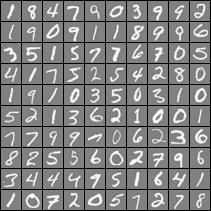

In [2]:
load('ex4data1.mat');
m = size(X, 1);

% Randomly select 100 data points to display
sel = randperm(size(X, 1));
sel = sel(1:100);

graphics_toolkit ('gnuplot');
displayData(X(sel, :));

#### Part 2: Loading Parameters

In [3]:
% Load the weights into variables Theta1 and Theta2
load('ex4weights.mat');

% Unroll parameters 
nn_params = [Theta1(:) ; Theta2(:)];

#### Part 3: Compute Cost (Feedforward)

In [4]:
fprintf('m = size(X, 1) = %d\n', size(X, 1))

m = size(X, 1) = 5000


In [5]:
% Weight regularization parameter (we set this to 0 here).
lambda = 1;

In [6]:
Theta1 = reshape(nn_params(1:hidden_layer_size * (input_layer_size + 1)), ...
                 hidden_layer_size, (input_layer_size + 1));

Theta2 = reshape(nn_params((1 + (hidden_layer_size * (input_layer_size + 1))):end), ...
                 num_labels, (hidden_layer_size + 1));

In [34]:
fprintf('size(Theta1) %d %d; size(Theta2) %d %d\n', size(Theta1), size(Theta2))

size(Theta1) 25 401; size(Theta2) 10 26


In [8]:
%% function code beguins here
a1 = [ones(m, 1) X];
fprintf('size(a1) = %d %d\n', size(a1));

size(a1) = 5000 401


In [9]:
z2 = a1 * Theta1';
a2 = sigmoid(z2);
fprintf('size(Theta2) = %d %d, size(a2) = %d %d, size(z2) %d %d\n', size(Theta2), size(a2), size(z2));

size(Theta2) = 10 26, size(a2) = 5000 25, size(z2) 5000 25


In [10]:
a2 = [ones(m, 1) a2];
fprintf('size Theta2 = %d %d; size a2 plus 1r = %d %d\n', size(Theta2), size(a2));

size Theta2 = 10 26; size a2 plus 1r = 5000 26


In [11]:
z3 = a2 * Theta2';
a3 = sigmoid(z3);
fprintf('size size a3 = %d %d; size y %d %d\n', size(a3), size(y));

size size a3 = 5000 10; size y 5000 1


In [12]:
yv = bsxfun(@eq, y, 1:num_labels);
fprintf('size yv = %d %d, y = %d %d\n', size(yv), size(y));

size yv = 5000 10, y = 5000 1


In [13]:
J = 0;
for i = 1:m
    for k = 1:num_labels
        J = J + ( - yv(i, k) * log(a3(i, k)) - (1 - yv(i, k)) * log(1 - a3(i, k)));
    end
end
J = J / m %% ok

J = 0.2876


In [14]:
size(yv(:,1)');
size(log(a3(:, 1)));
size((1 - yv(:,1)'));
size(log(1 - a3(:, 1)));
fprintf('a3(:, 1) %d %d, yvT % d %d\n', size(a3(:, 1)), size(yv(:,1)'));

a3(:, 1) 5000 1, yvT  1 5000


In [15]:
% faster than previous implementation
Jvec = zeros(num_labels, 1);
for k = 1:num_labels
    Jvec(k) = -yv(:,k)' * log(a3(:, k))  -  (1 - yv(:,k)') * log(1 - a3(:, k));
end
sum(Jvec)/m

ans = 0.2876


In [16]:
disp(Jvec)

   105.772
   151.134
   197.316
   148.616
   149.922
   101.331
   141.140
   173.736
   197.319
    71.858


In [17]:
Jvec = sum(Jvec)/m %% ok

Jvec = 0.2876


In [18]:
size(Theta1)

ans =

    25   401



In [19]:
reg1 = 0;
for j = 1:size(Theta1, 1);
    for k = 2:size(Theta1, 2);
        reg1 = reg1 + Theta1(j, k).^2;
    end
end
disp(reg1)

392.58
ans =

   1   1



In [20]:
regt = sum(sum(Theta1(:, 2:size(Theta1, 2)).^2)) + sum(sum(Theta2(:, 2:size(Theta2, 2)).^2))

regt = 961.41


In [21]:
regt = lambda * regt / (2 * m)

regt = 0.096141


In [22]:
Jreg = Jvec + regt

Jreg = 0.3838


### Brack propagation

#### sigmoid gradient

In [23]:
gprime3 = a3 .* (1 - a3);

In [24]:
fprintf('size(a3) = %d %d, size(gprime3) = %d %d, size(yv) = %d %d\n', size(a3), size(gprime3), size(yv))

size(a3) = 5000 10, size(gprime3) = 5000 10, size(yv) = 5000 10


In [25]:
g = sigmoidGradient([-1 -0.5 0 0.5 1])

g =

   0.1966   0.2350   0.2500   0.2350   0.1966



In [26]:
delta3 = (a3 - yv);
fprintf('size(delta3) = %d %d\n', size(delta3));

size(delta3) = 5000 10


In [27]:
fprintf('size(Theta2) = %d %d, size(delta3) = %d %d, , size(a2) = %d %d\n', size(Theta2), size(delta3), size(a2));

size(Theta2) = 10 26, size(delta3) = 5000 10, , size(a2) = 5000 26


In [28]:
delta2 = (delta3 * Theta2) .* a2 .* (1 - a2);
%delta2 = (Theta2(:, 2:end)' * delta3) .* sigmoidGradient(z2)';
fprintf('size(delta2) = %d %d\n', size(delta2));

size(delta2) = 5000 26


In [29]:
fprintf('size(a2) = %d %d, size(delta3) = %d %d\n', size(a2), size(delta3));

size(a2) = 5000 26, size(delta3) = 5000 10


In [30]:
Delta2 = (a2' * delta3)';
fprintf('size(Delta2) = %d %d\n', size(Delta2));

size(Delta2) = 10 26


In [31]:
fprintf('size(a1) = %d %d, size(delta2) = %d %d\n', size(a1), size(delta2));

size(a1) = 5000 401, size(delta2) = 5000 26


In [32]:
Delta1 = (a1' * delta2(:, 2:end))';
fprintf('size(Delta1) = %d %d\n', size(Delta1));

size(Delta1) = 25 401


In [33]:
Theta1_grad = Delta1 / m;
Theta2_grad = Delta2 / m;
fprintf('size(Delta1) %d %d, size(Delta2) %d %d\n',size(Delta1), size(Delta2))

size(Delta1) 25 401, size(Delta2) 10 26


In [38]:
size(Theta1_grad(:, 2:end) + (lambda/m)*Theta1(:, 2:end))


ans =

    25   400

